In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, time ,timedelta
import seaborn as sns

In [50]:
data = pd.read_csv('girlgeneration(utf8).csv')

In [51]:
#將時間資料做處理

data['Date'] = data['CREATE_DATE'].apply(lambda x: x.split()[0].replace('/', '-'))
data['a.m./p.m.'] = data['CREATE_DATE'].apply(lambda x: x.split()[1])
data['Time'] = data['CREATE_DATE'].apply(lambda x: x.split()[2].replace('.', ''))
data['hour'] = data['Time'].apply(lambda x: x.split(':')[0])
data['minute'] = data['Time'].apply(lambda x: x.split(':')[1])
data['second'] = data['Time'].apply(lambda x: x.split(':')[2])
#data['Time'] = data[['Time', 'a.m./p.m.']].apply(lambda x: ' '.join(x), axis=1)

#data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
#data['Time'] = data['Time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S'))

In [52]:
#將時間資料做處理

time = []
for i in range(0,len(data)):
    if data['a.m./p.m.'][i] == 'p.m.':
        if data['hour'][i] == '12':
            time.append('12')
        else:
            time.append(str(int(data['hour'][i]) + 12))
    else:
        if data['hour'][i] == '12':
            time.append('00')
        else:
            time.append(data['hour'][i])

data['hour'] = time        

In [53]:
#將時間資料做處理

data['Time'] = data[['hour', 'minute', 'second']].apply(lambda x: ':'.join(x), axis=1)
data['Date'] = data[['Date', 'Time']].apply(lambda x: ' '.join(x), axis=1)
data['Date'] = data['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [54]:
data

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,PROGRAM_ID,PROGRAM_NAME,CREATE_DATE,PLAY_DATE,PLAY_TIME,...,ORDER_NUM,TICKET_ENTRANCE_NO,SEX,ADDRESS,Date,a.m./p.m.,Time,hour,minute,second
0,331,26237,52196,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,...,26237,0,male,2103,2010-10-14 23:25:58,p.m.,23:25:58,23,25,58
1,332,26237,52195,2,K12197,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/14 p.m. 11:25:58.,2010/10/17,15:00,...,26237,0,male,2103,2010-10-14 23:25:58,p.m.,23:25:58,23,25,58
2,378,24923,46903,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:26:37.,2010/10/17,15:00,...,24923,0,male,2682,2010-09-18 23:26:37,p.m.,23:26:37,23,26,37
3,379,24923,46902,3,L22289,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:26:37.,2010/10/17,15:00,...,24923,0,male,2682,2010-09-18 23:26:37,p.m.,23:26:37,23,26,37
4,586,24930,46919,4,C12101,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 11:28:56.,2010/10/17,15:00,...,24930,0,male,718,2010-09-18 23:28:56,p.m.,23:28:56,23,28,56
5,603,26034,51814,2,T12237,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/10/12 p.m. 11:32:13.,2010/10/17,15:00,...,26034,0,male,765,2010-10-12 23:32:13,p.m.,23:32:13,23,32,13
6,608,23352,43680,13,133062,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 06:19:26.,2010/10/17,15:00,...,23352,0,female,1199,2010-09-18 18:19:26,p.m.,18:19:26,18,19,26
7,609,23352,43678,12,133062,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 06:19:26.,2010/10/17,15:00,...,23352,0,female,1199,2010-09-18 18:19:26,p.m.,18:19:26,18,19,26
8,616,23603,44220,3,H22363,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 06:41:03.,2010/10/17,15:00,...,23603,0,female,755,2010-09-18 18:41:03,p.m.,18:41:03,18,41,03
9,617,23603,44219,3,H22363,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 06:41:03.,2010/10/17,15:00,...,23603,0,female,755,2010-09-18 18:41:03,p.m.,18:41:03,18,41,03


In [87]:
#將時間設為index，並做排序

data.index = data['Date']
data1 = data.sort_index(axis=0, ascending=True)

                     SERIAL_ID  ORDER_ID  TICKET_ITEM_ID  PRINT_TIMES  \
Date                                                                    
2010-10-14 23:25:58        331     26237           52196            2   
2010-10-14 23:25:58        332     26237           52195            2   
2010-09-18 23:26:37        378     24923           46903            3   
2010-09-18 23:26:37        379     24923           46902            3   
2010-09-18 23:28:56        586     24930           46919            4   
2010-10-12 23:32:13        603     26034           51814            2   
2010-09-18 18:19:26        608     23352           43680           13   
2010-09-18 18:19:26        609     23352           43678           12   
2010-09-18 18:41:03        616     23603           44220            3   
2010-09-18 18:41:03        617     23603           44219            3   
2010-09-18 18:04:38        638     23156           43258            4   
2010-09-18 18:04:38        639     23156           

ValueError: No axis named 3 for object type <class 'pandas.core.frame.DataFrame'>

In [ ]:
#將資料依票號做排序
data1 = data1.sort(['TICKET_ITEM_ID'], ascending=True)

In [24]:
data1

,SERIAL_ID,ORDER_ID,TICKET_ITEM_ID,PRINT_TIMES,IDENTITY,PROGRAM_ID,PROGRAM_NAME,CREATE_DATE,PLAY_DATE,PLAY_TIME,...,ORDER_NUM,TICKET_ENTRANCE_NO,SEX,ADDRESS,Date,a.m./p.m.,Time,hour,minute,second
Date,,,,,,,,,,,,,,,,,,,,,
2010-09-18 13:18:55,35032,21314,38906,4,E12347,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 01:18:55.,2010/10/17,15:00,...,21314,0,male,26857,2010-09-18 13:18:55,p.m.,13:18:55,13,18,55
2010-09-18 13:22:33,35510,21315,38908,5,C12086,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 01:22:33.,2010/10/17,15:00,...,21315,1,male,25666,2010-09-18 13:22:33,p.m.,13:22:33,13,22,33
2010-09-18 13:22:33,35509,21315,38909,4,C12086,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 01:22:33.,2010/10/17,15:00,...,21315,1,male,25666,2010-09-18 13:22:33,p.m.,13:22:33,13,22,33
2010-09-18 13:22:33,35508,21315,38910,4,C12086,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 01:22:33.,2010/10/17,15:00,...,21315,1,male,25666,2010-09-18 13:22:33,p.m.,13:22:33,13,22,33
2010-09-18 13:22:33,35511,21315,38907,6,C12086,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 01:22:33.,2010/10/17,15:00,...,21315,1,male,25666,2010-09-18 13:22:33,p.m.,13:22:33,13,22,33
2010-09-18 13:23:48,12329,21316,38911,3,G22178,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 01:23:48.,2010/10/17,15:00,...,21316,0,female,7414,2010-09-18 13:23:48,p.m.,13:23:48,13,23,48
2010-09-18 13:23:48,12327,21316,38913,3,G22178,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 01:23:48.,2010/10/17,15:00,...,21316,0,female,7414,2010-09-18 13:23:48,p.m.,13:23:48,13,23,48
2010-09-18 13:23:48,12328,21316,38912,3,G22178,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 01:23:48.,2010/10/17,15:00,...,21316,0,female,7414,2010-09-18 13:23:48,p.m.,13:23:48,13,23,48
2010-09-18 13:29:46,25857,21317,38915,3,S12312,11,Girls Generation. THE lst ASIA TOUR Into the n...,2010/9/18 p.m. 01:29:46.,2010/10/17,15:00,...,21317,1,male,14964,2010-09-18 13:29:46,p.m.,13:29:46,13,29,46


In [25]:
#設定新的欄位，count1為只要成功購買就就給1，count2為總請求數，count3為沒被處理到的數量

temp = []
data1['Count1'] = 1
data1['Count2'] = 1
temp1 = data1['TICKET_ITEM_ID'][0]
for i in range(0, len(data1)):
    diff = data1['TICKET_ITEM_ID'][i] - temp1
    if diff > 1:
        #data1['Count'][i] += diff
        temp.append(diff)
    else:
        temp.append(0)
        
    temp1 = data1['TICKET_ITEM_ID'][i]
data1['Count2'] = data1['Count1'] + temp
data1['Count3'] = temp

In [26]:
#將同日期的資料做合併，新設Miss欄位標示在該時間點要跳號情況

data2 = data1[['Count1', 'Count2', 'Count3']].groupby(data1['Date'], as_index = True).sum()
data2['Miss'] = np.where(data2['Count3'] != 0, 1, 0)

In [27]:
data2

,Count1,Count2,Count3,Miss
Date,,,,
2010-09-18 13:18:55,1,1,0,0
2010-09-18 13:22:33,4,6,2,1
2010-09-18 13:23:48,3,9,6,1
2010-09-18 13:29:46,2,5,3,1
2010-09-18 13:29:55,4,9,5,1
2010-09-18 13:30:58,2,6,4,1
2010-09-18 13:33:20,1,1,0,0
2010-09-18 13:34:10,4,9,5,1
2010-09-18 13:34:16,1,1,0,0


In [28]:
#將data2做切割，因為我們發現售票日期分成兩段

data2_1 = data2.loc[:'2010-09-19 12:44:46']
data2_2 = data2.loc['2010-10-09 00:38:39':]
data2_2['Count2'][0] = 2
data2_2['Count3'][0] = 0

/usr/local/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
#找出總請求數和跳號機率的關係

data2_1[['Count2', 'Miss']].groupby(['Count2'], as_index = True).mean()

,Miss
Count2,
1,0.000000
2,0.000000
3,0.818627
4,0.946237
5,1.000000
6,1.000000
7,1.000000
8,1.000000
9,1.000000


In [30]:
#找出總請求數和成功處理數量的關係

data2_1[['Count2', 'Count1']].groupby(['Count2'], as_index = True).mean()

,Count1
Count2,
1,1.000000
2,2.000000
3,1.362745
4,1.933333
5,1.985294
6,2.444444
7,2.609302
8,3.119792
9,3.400000


In [48]:
#將data2_1資料分群，找出不同時間區段的Miss數量

sample = 100
temp_missarr1 = []
temp_miss = 0
for i in range(0, len(data2_1), sample):
    if i < (len(data2_1)-sample):
        temp_miss = 0
        for j in range(i, sample+i):
            temp_miss += data2_1['Miss'][j]
        temp_missarr1.append(temp_miss)

print(temp_missarr1)
        #data2_1['Pct'] = data2_1['Miss'][j] 

[82, 87, 77, 83, 79, 69, 78, 78, 78, 85, 78, 71, 84, 81, 88, 72, 72, 86, 86, 72, 81, 74, 74, 70, 74, 89, 73]


In [47]:
#將data2_2資料分群，找出不同時間區段的Miss數量

sample = 100
temp_missarr2 = []
temp_miss = 0
for i in range(0, len(data2_2), sample):
    if i < (len(data2_2)-sample):
        temp_miss = 0
        for j in range(i, sample+i):
            temp_miss += data2_2['Miss'][j]
        temp_missarr2.append(temp_miss)
    
print(temp_missarr2)
        #data2_1['Pct'] = data2_1['Miss'][j] 

[65, 76, 59, 71]


In [42]:
Miss2_1 = pd.DataFrame()
Miss2_2 = pd.DataFrame()

Miss2_1['Miss_freq'] = temp_missarr1
Miss2_2['Miss_freq'] = temp_missarr2

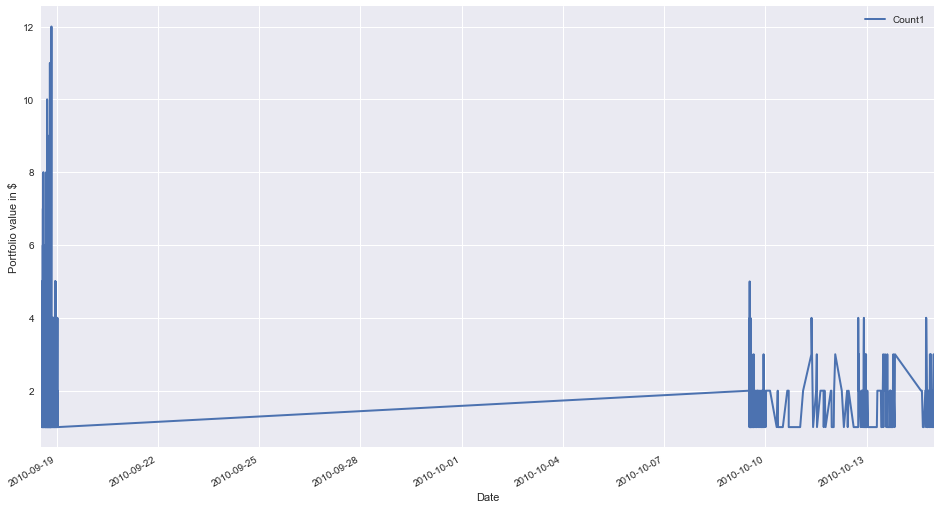

In [43]:
# Create a figure
fig = plt.figure(figsize=(16, 9))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
data2[['Count1']].plot(ax=ax1, lw=2.)


# Show the plot
plt.show()

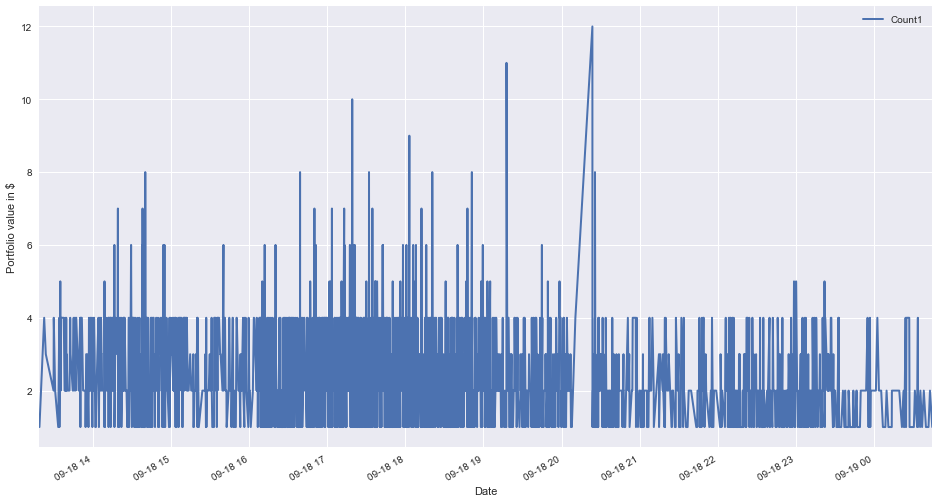

In [35]:
# Create a figure
fig = plt.figure(figsize=(16, 9))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
data2_1[['Count1']].plot(ax=ax1, lw=2.)


# Show the plot
plt.show()

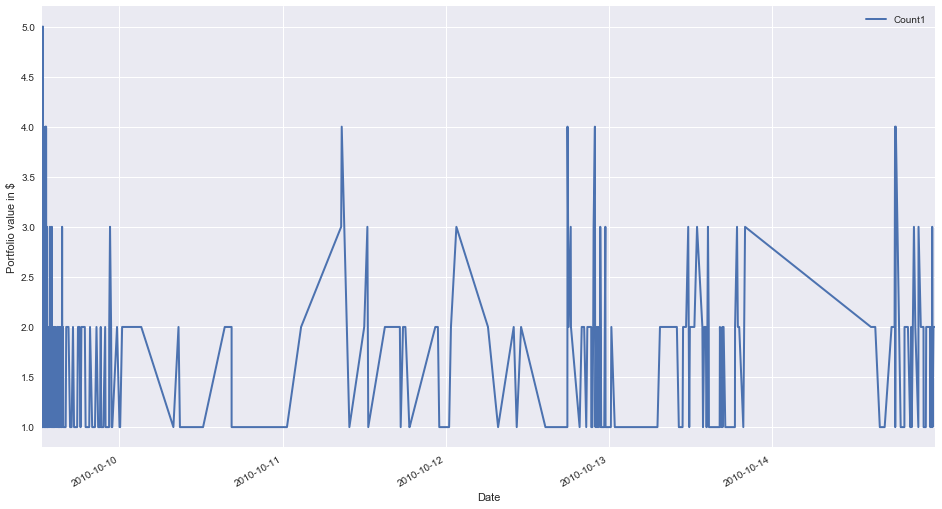

In [40]:
# Create a figure
fig = plt.figure(figsize=(16, 9))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
data2_2[['Count1']].plot(ax=ax1, lw=2.)


# Show the plot
plt.show()